Today, an estimated 700,000 people in the United States are living with a primary brain tumor. Brain tumors can be deadly, significantly impact quality of life, and change everything for a patient and their loved ones. They do not discriminate, inflicting men, women, and children of all races and ethnicities.

The ability to detect a tumor earlier, however, when it is smaller, reduces the impact of surgery and treatment, improving the prognosis for many patients.

Thus, we attempt to use brain MRI images to detect whether a brain has tumor or not

### Library Installations

In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

In [9]:
pip install tensorflow

  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install opencv-python

In [12]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Tensorflow / Keras

from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for assembling a Neural Network model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, ReLU, LeakyReLU, Dropout # adding layers to the Neural Network model
from keras.utils import plot_model # for plotting model diagram
from keras.optimizers import Adam # for model optimization 


# Data manipulation

import numpy as np # for data manipulation
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #For OS related functions
import sklearn


# Image processing

import cv2 # for ingesting images

#Visualization

import matplotlib 
import matplotlib.pyplot as plt # or data visualizationa
import graphviz # for showing model MinMaxScalerdiagram

## Data Analysis and Transformation

### Let's display 1 example of all types of tumor

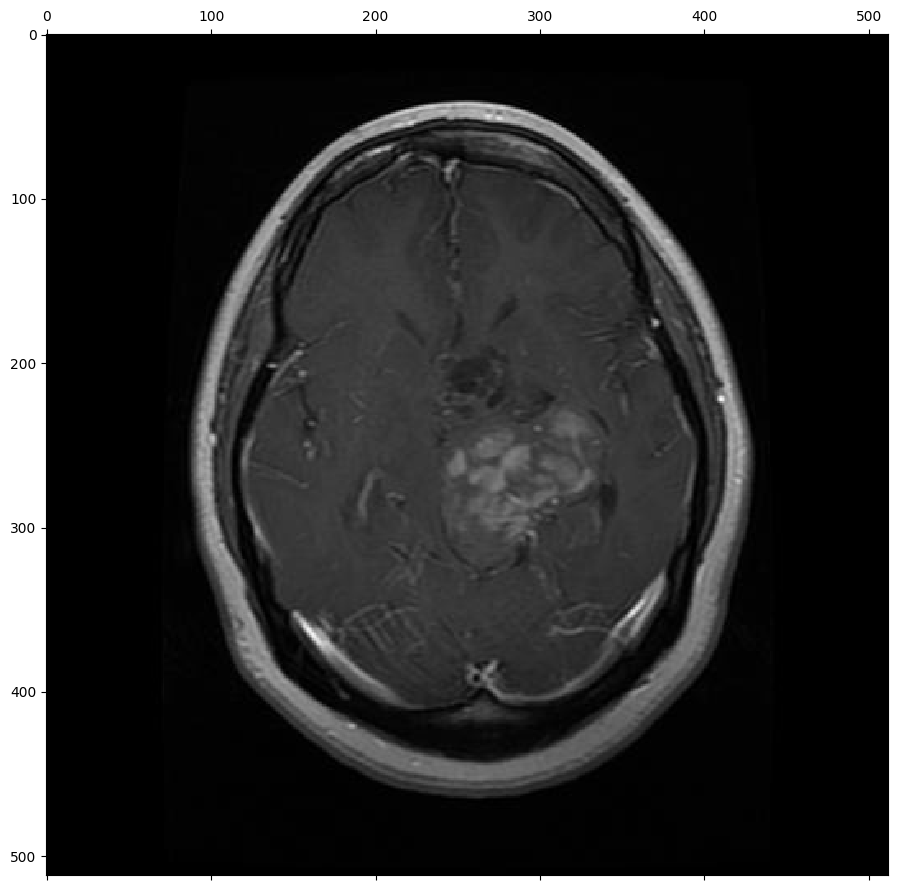

Shape : 
(512, 512, 3)


In [3]:
image = cv2.imread(os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (1).jpg")
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
print("Shape : ")
print(image.shape)

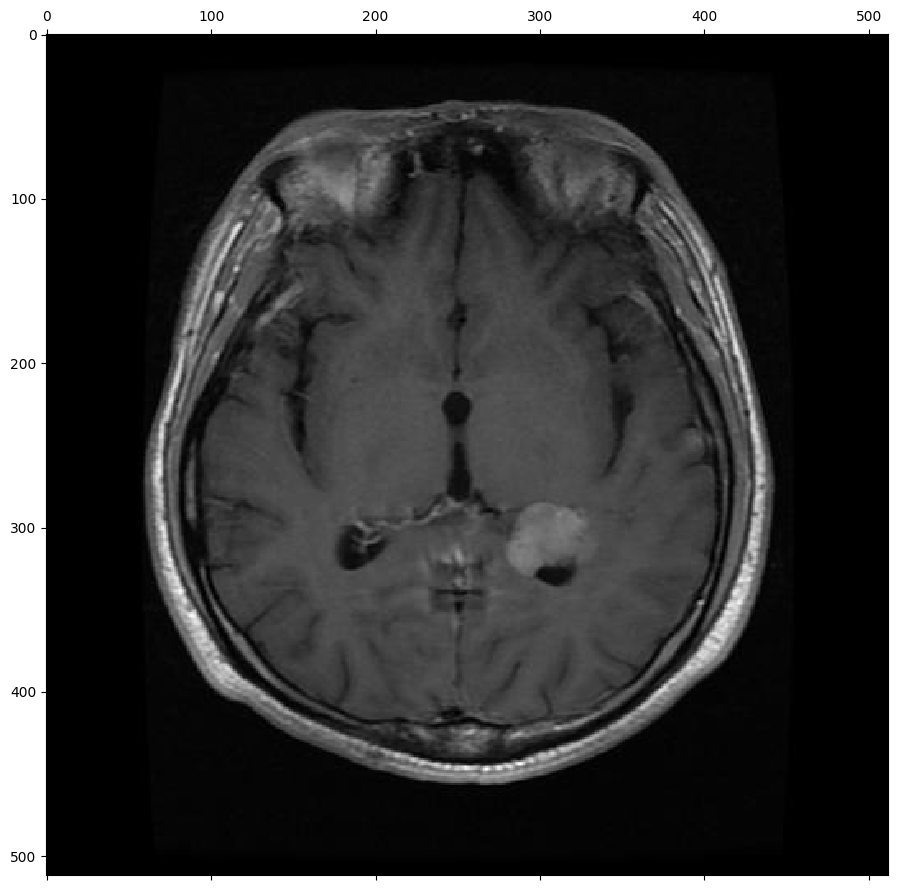

Shape : 
(512, 512, 3)


In [4]:
image = cv2.imread(os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (101).jpg")
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
print("Shape : ")
print(image.shape)

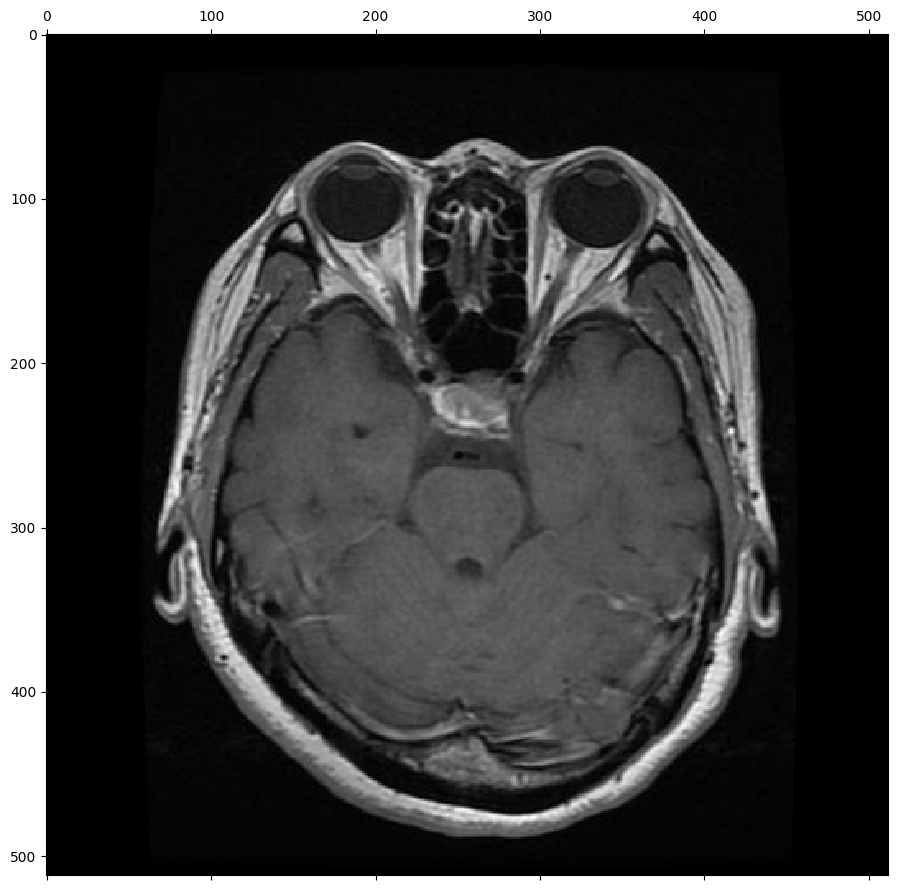

Shape : 
(512, 512, 3)


In [5]:
image = cv2.imread(os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (1).jpg")
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
print("Shape : ")
print(image.shape)

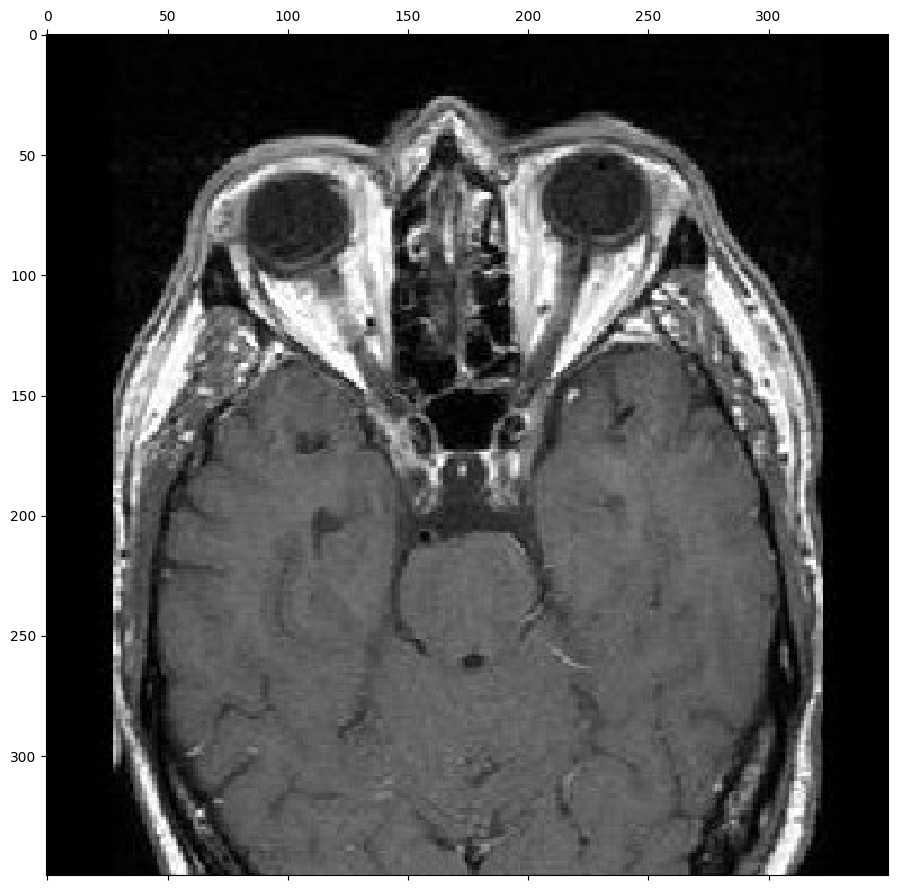

Shape : 
(350, 350, 3)


In [6]:
image = cv2.imread(os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/1.jpg")
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
print("Shape : ")
print(image.shape)

Images seem to have different shapes. We will standarize them below, and also convert images to RGB format

Also, for this walkthrough, we'll consider 2 labels : 

1. 'no' (no_tumor) 

2. 'yes' (glioma_tumor,meningioma_tumor,pituitary_tumor)

Hence, we will classify based on a Brain MRI image whether a patient has Brain Tumor or not

In [7]:
os.getcwd()

'C:\\Users\\Abhijeet Gupta\\Documents\\Northeastern University\\Academics\\EAI 6080 - Advanced Analytical Utilization\\Final Project - Brain Tumor CNN'

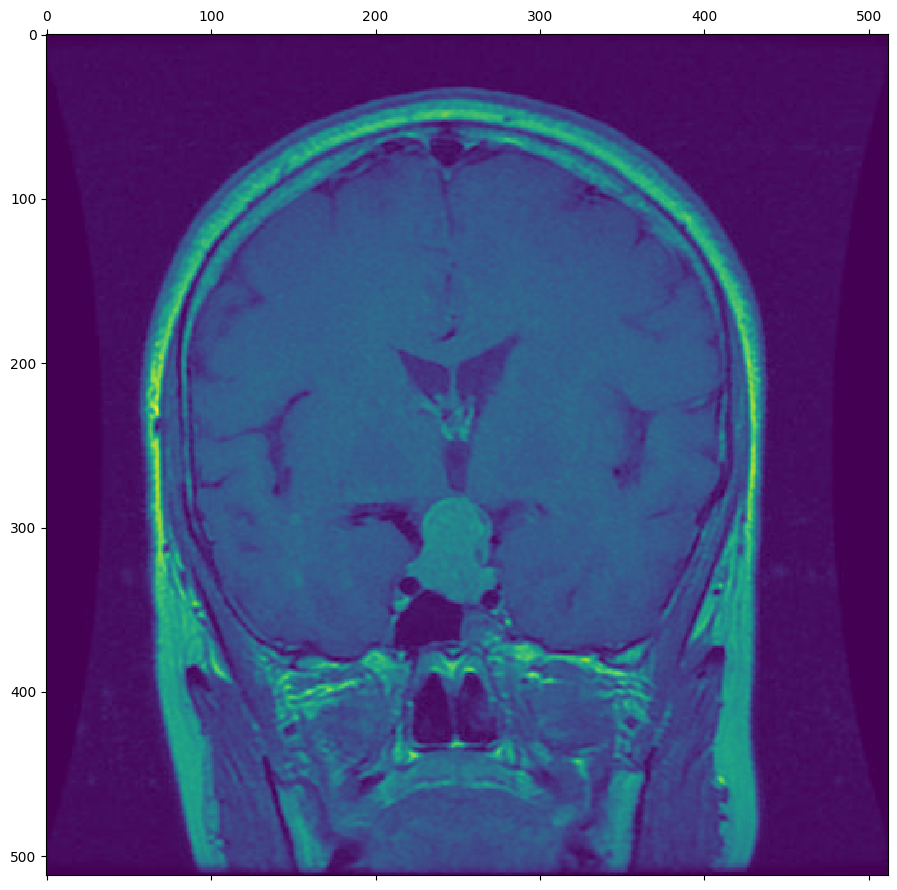

Shape of data_lowres:  (2870, 256, 256)


In [8]:
Tumor_Label = [] 

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Training/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths=ImagePaths+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label.append("no")
        else:
            Tumor_Label.append("yes")
        
        
# Load images and resize to 256 x 256
data_lowres=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres.append(image_lowres)
    
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres = np.array(data_lowres, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres: ", data_lowres.shape)

We also need to convert the label from text to numeric format, thus we use get_dummies from Pandas to do so

In [9]:
Tumor_Label = pd.Series(Tumor_Label,name='Tumor_Status')
Tumor_Label = pd.get_dummies(Tumor_Label)

In [10]:
Tumor_Label

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2865,0,1
2866,0,1
2867,0,1
2868,0,1


In [11]:
data_lowres = data_lowres.reshape(-1,256, 256,1)

In [12]:
print(data_lowres.shape)
print(Tumor_Label.shape)

(2870, 256, 256, 1)
(2870, 2)


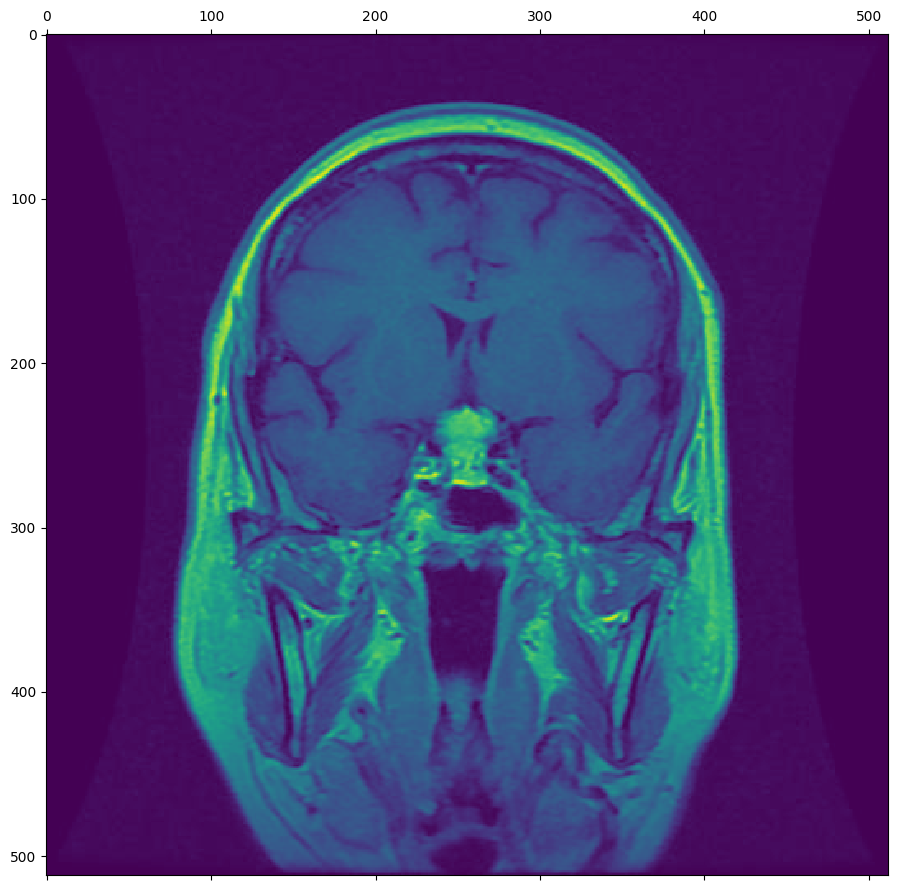

Shape of data_lowres_test:  (394, 256, 256)


In [13]:
Tumor_Label_test = [] 

# Create a list to store image paths and populate Tumor Label Variable

ImagePaths_test=[]
for tumor_status in ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]:
    count_tumor_status = 0
    ImgLocation = os.getcwd()+"/kaggle/input/brain-tumor-classification-mri/Testing/"+tumor_status
    for image in list(os.listdir(ImgLocation)):
        ImagePaths_test=ImagePaths_test+[ImgLocation+"/"+image]
        count_tumor_status += 1
        if tumor_status == "no_tumor":
            Tumor_Label_test.append("no")
        else:
            Tumor_Label_test.append("yes")
        
        
# Load images and resize to 256 x 256
data_lowres_test=[]
for img in ImagePaths_test:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_lowres = cv2.resize(image, (256, 256))
    data_lowres_test.append(image_lowres)
    
fig, axs = plt.subplots(1, 1, sharey=False, tight_layout=True, figsize=(16,9), facecolor='white')
axs.matshow(image)
plt.show() 
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_lowres_test = np.array(data_lowres_test, dtype="float") / 255.0
# Show data shape
print("Shape of data_lowres_test: ", data_lowres_test.shape)

We also need to convert the label from text to numeric format, thus we use get_dummies from Pandas to do so

In [14]:
Tumor_Label_test = pd.Series(Tumor_Label_test,name='Tumor_Status')
Tumor_Label_test = pd.get_dummies(Tumor_Label_test)

In [15]:
Tumor_Label_test

,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
389,0,1
390,0,1
391,0,1
392,0,1


In [16]:
data_lowres_test = data_lowres_test.reshape(-1,256, 256,1)

In [17]:
print(data_lowres_test.shape)
print(Tumor_Label_test.shape)

(394, 256, 256, 1)
(394, 2)


# Convolutional Neural Network

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

In the code below, we will design a Convolutional Neural Network from scratch.

In [18]:
from tensorflow.keras import layers

model = keras.Sequential([
    
    layers.InputLayer(input_shape=(256, 256,1)),

    # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),                  
    layers.MaxPool2D(),    
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),


    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),

    
    # Fourth Convolutional Block
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    # Fifth Convolutional Block
    layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    
    
    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=512, activation="relu"),
    layers.Dropout(rate=0.1),
    layers.BatchNormalization(),
    
    layers.Dense(units=2, activation="sigmoid"),
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0

In [19]:
from keras.callbacks import EarlyStopping

# compile the model
model.compile(optimizer='adam', 
loss='binary_crossentropy', 
metrics=['binary_accuracy'])



early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# fit the model
history = model.fit(
    data_lowres,
    Tumor_Label,
    validation_data = (data_lowres_test,Tumor_Label_test),
    callbacks=[early_stopping],
    epochs=1000,
)

Epoch 1/1000
90/90 [==============================] - 339s 4s/step - loss: 0.5228 - binary_accuracy: 0.8646 - val_loss: 6.1622 - val_binary_accuracy: 0.2665
Epoch 2/1000
90/90 [==============================] - 328s 4s/step - loss: 0.2390 - binary_accuracy: 0.9225 - val_loss: 10.9966 - val_binary_accuracy: 0.2665
Epoch 3/1000
90/90 [==============================] - 338s 4s/step - loss: 0.1676 - binary_accuracy: 0.9371 - val_loss: 18.2778 - val_binary_accuracy: 0.2665
Epoch 4/1000
90/90 [==============================] - 321s 4s/step - loss: 0.1706 - binary_accuracy: 0.9389 - val_loss: 6.1909 - val_binary_accuracy: 0.2665
Epoch 5/1000
90/90 [==============================] - 319s 4s/step - loss: 0.1485 - binary_accuracy: 0.9451 - val_loss: 2.8160 - val_binary_accuracy: 0.3617
Epoch 6/1000
90/90 [==============================] - 336s 4s/step - loss: 0.1029 - binary_accuracy: 0.9608 - val_loss: 1.1004 - val_binary_accuracy: 0.6332
Epoch 7/1000
90/90 [==============================] - 32

In [20]:
loss, accuracy = model.evaluate(data_lowres_test,Tumor_Label_test)
loss, accuracy

13/13 [==============================] - 15s 1s/step - loss: 0.3969 - binary_accuracy: 0.8997


(0.39687246084213257, 0.8997461795806885)

<AxesSubplot:>

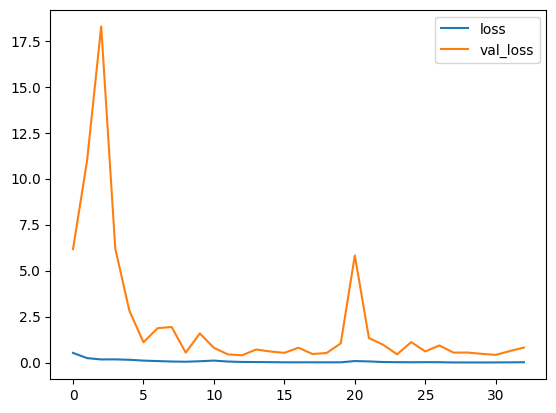

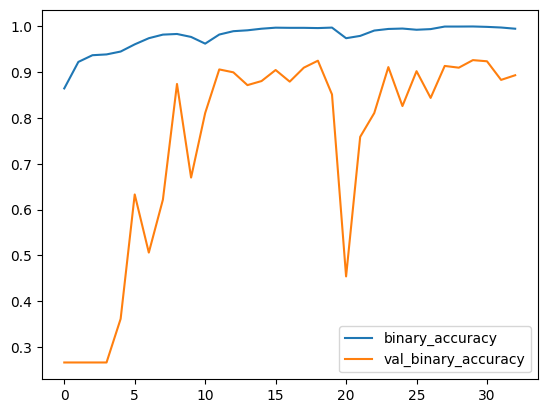

In [24]:
history_df = pd.DataFrame(history.history)

# extract the accuracy values from the history object
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

### We have a model that predicts whether a patient has Brain Tumor or not with ~90% validation accuracy. 

### However, due to target class imbalance, we must calculate Precision, Recall and F1-Score

In [22]:
y_pred = np.argmax(model.predict(data_lowres_test), axis=1)

print(y_pred)

13/13 [==============================] - 9s 679ms/step
[1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [27]:
from sklearn.metrics import classification_report

print(classification_report(Tumor_Label_test['yes'], y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       105
           1       0.95      0.91      0.93       289

    accuracy                           0.90       394
   macro avg       0.86      0.89      0.87       394
weighted avg       0.90      0.90      0.90       394



In [26]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(Tumor_Label_test['yes'], y_pred)
print("\nConfusion matrix\n"+str(conf))


Confusion matrix
[[ 90  15]
 [ 25 264]]


# We have F1 of 93% on Positive Class, which is great. 

## Athough we could still improve it by reducing False Negatives - they can be dangerous as this means cancer patients are classified as non-cancerous